- __NAMA            : Alif Muhamad Hafidz__
- __NIM             : 09011281722044__
- __KELAS           : SK5B__
- __MK              : KECERDASAN BUATAN__
- __Dosen Pengampuh : Prof. Dr. Ir. Siti Nurmaini, M.T.__

# Sistem Interferensi Fuzzy untuk Memprediksi Prestasi Belajar Mahasiswa Berdasarkan Nilai Ujian Nasional,Tes Potensi Akademik, dan Motivasi Belajar

IPK merupakan sebuah nilai acuan untuk melihat Potensi Akadamik seorang Mahasiswa.Dengan Melihat TPA,NEM,dan Motivasi belajar 
Mahasiswa kita juga dapat menentukan nilai IPK dari ketiga Input tadi,sehingga kita dapat mengetahui apakah IPK Mahasiswa itu Tidak Memuaskan, Kurang Memuaskan, Memuaskan, dan Sangat Memuaskan.

In [12]:
#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
import skfuzzy as fuzz #import library fuzzy gunakan fuzz untuk menggunkaan library ini
from skfuzzy import control as ctrl #Memanggil Library control dari skfuzzy gunakan ctrl untuk menggunakan library ini
import numpy as np #import numpy Menggunkan np untuk menggunakan library ini
import matplotlib.pyplot as plt #import matplotlib 


# 1. Fuzzyfikasi
Fuzzyfikasi merupakan proses untuk mengubah input sistem yang mempunyai nilai tegas menjadi variabel linguistik munggunakan fungsi keanggotaan yang disimpan dalam basis pengetahuan fuzzy. Dalam hal ini, terdapat 4 variabel, yaitu 3 variabel input dan 1 variabel output.

## Variabel Input  (Antecedents) :
<br>1. TPA : Kurang dan Baik.
<br>2. NEM : Rendah dan Tinggi.
<br>3. VM  : Rendah dan Tinggi.

## Variabel Output (Consequents) :
IPK : Tidak Memuaskan,Kurang Memuaskan,Memuaskan, dan Sangat Memuaskan.


## Deklarasi TPA sebagai Variabel Input 1 

Fungsi Keanggotaan TPA (Kurang) dan Fungsi Keanggotaan TPA (Baik)

$TPA [Kurang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 103 \\
       {103-x \over 103-63} & \mbox{; } 63 ≤ x ≤ 103 \\
       1 & \mbox{; } x < 63
    \end{array}
\right.$

$TPA [Baik] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 63 \\
       {x-63 \over 103-63} & \mbox{; } 63 ≤ x ≤ 103 \\
       1 & \mbox{; }103 ≤ x < 125
    \end{array}
\right.$


| Fungsi |   Nama Variabel    | Nama Himpunan Fuzzy |   Semesta pembicaraan  | Domain      |
|--------|--------------------|---------------------|------------------------|-------------|
| Input 1 | TPA               |   Kurang            |   [1..125]             |  [1..103]    |
|        |                    |   Baik            |                          |  [63..125]   |


C:\Users\Alif\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


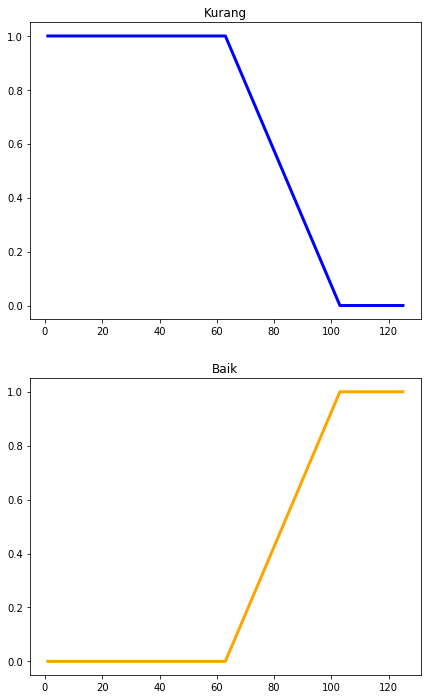

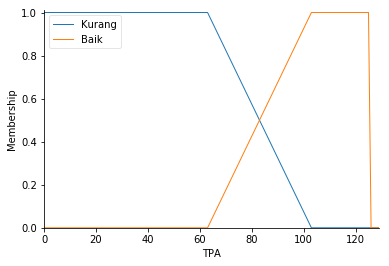

In [13]:
TPA = np.arange(1,126,1) #membuat range menggunakan library numpy pada variabel Input TPA
Kurang = fuzz.trapmf(TPA, [1,1,63,103]) #Fungsi Keanggotaan Input TPA berupa 'Kurang'
Baik = fuzz.trapmf(TPA, [63,103,125,125]) #Fungsi Keanggotaan Input TPA berupa 'Baik'

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(7, 12)) #Menggunakan Library Matplotlib untuk membentuk Plot dengan 2 kolom
ax0.plot(TPA, Kurang, 'blue'  , linewidth = 3, label = 'Kurang') #Membentuk Plot untuk Fungsi Keanggotaan 'Kurang'
ax1.plot(TPA, Baik, 'orange'  , linewidth = 3, label = 'Baik') #Membentuk Plot untuk Fungsi Keanggotaan 'Baik'

ax0.set_title('Kurang') #Title pada Plot 'Kurang'
ax1.set_title('Baik') #Title pada Plot 'Baik'

TPA = ctrl.Antecedent(np.arange(0,130,1), 'TPA') #variabel Input TPA dengan nilai 0 samapai 50 dengan range 1
TPA['Kurang'] = fuzz.trapmf(TPA.universe, [0,0,63,103]) #Fungsi Keanggotaan 'Kurang' dengan nilai 0 - 103
TPA['Baik'] = fuzz.trapmf(TPA.universe, [63,103,125,125]) #Fungsi Keanggotaan 'Baik' dengan nilai 63 - 125
TPA.view() #Mencetak Plot untuk Input TPA

## Deklarasi NEM sebagai Variabel Input 2 

Fungsi Keanggotaan NEM (Rendah) dan Fungsi Keanggotaan NEM (Tinggi)

$NEM [Rendah] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 8.8 \\
       {8.8-x \over 8.8-4.3} & \mbox{; } 4.3 ≤ x < 8.8 \\
       1 & \mbox{; } x < 4.3
    \end{array}
\right.$

$NEM [Tinggi] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x < 8.8 \\
       {x-4.3 \over 8.8-4.3} & \mbox{; } 4.3 ≤ x < 8.8 \\
       1 & \mbox{; } 8.8 ≤ x ≤ 10
    \end{array}
\right.$


| Fungsi |   Nama Variabel    | Nama Himpunan Fuzzy |   Semesta pembicaraan  | Domain      |
|--------|--------------------|---------------------|------------------------|-------------|
    | Input 2 | NEM             |   Rendah           |   [1..15.8]             |  [1.....8.8]    |
|        |                    |   Tinggi            |                          |  [4.3....10]   |


C:\Users\Alif\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


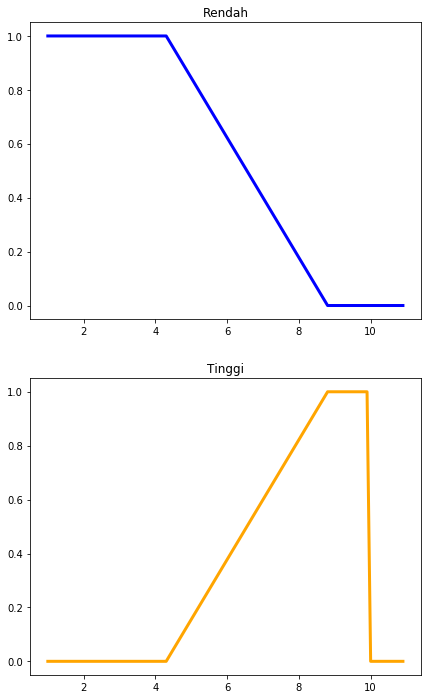

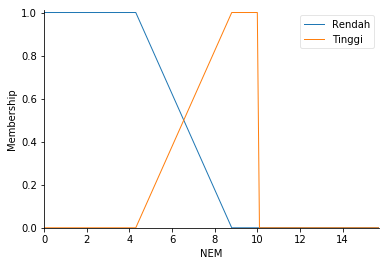

In [14]:
NEM = np.arange(1,11,0.1) #Membuat range menggunakan library numpy pada variabel Input NEM
Rendah = fuzz.trapmf(NEM, [1,1,4.3,8.8]) #Fungsi Keanggotaan Input NEM berupa 'Rendah'
Tinggi = fuzz.trapmf(NEM, [4.3,8.8,10,10]) #Fungsi Keanggotaan Input NEM berupa 'Tinggi'

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(7, 12)) #Menggunakan Library Matplotlib untuk membentuk Plot dengan 2 kolom
ax0.plot(NEM, Rendah, 'blue'  , linewidth = 3, label = 'Rendah') #Membentuk Plot untuk Fungsi Keanggotaan 'Rendah'
ax1.plot(NEM, Tinggi, 'orange'  , linewidth = 3, label = 'Tinggi') #Membentuk Plot untuk Fungsi Keanggotaan 'Tinggi'

ax0.set_title('Rendah') #Title pada Plot 'Rendah'
ax1.set_title('Tinggi') #Title pada Plot 'Tinggi'

NEM = ctrl.Antecedent(np.arange(0,15.8,0.1), 'NEM') #variabel Input NEM dengan nilai 0 samapai 15.8 dengan range 0.1
NEM['Rendah'] = fuzz.trapmf(NEM.universe, [0,0,4.3,8.8]) #Fungsi Keanggotaan 'Rendah' dengan nilai 0 - 8.8
NEM['Tinggi'] = fuzz.trapmf(NEM.universe, [4.3,8.8,10,10]) #Fungsi Keanggotaan 'Tinggi' dengan nilai 4.3 - 10
NEM.view() #Mencetak Plot untuk Input NEM

## Deklarasi VM sebagai Variabel Input 3 

Fungsi Keanggotaan VM (Rendah) dan Fungsi Keanggotaan VM (Tinggi)

$Motivasi [Rendah] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 4.47 \\
       {4.47-x \over 4.47-2.04} & \mbox{; } 2.04 ≤ x < 4.47 \\
       1 & \mbox{; }  x < 2.04
    \end{array}
\right.$

$Motivasi [Tinggi] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x < 2.04 \\
       {x-2.04 \over 4.47-2.04} & \mbox{; } 2.04 ≤ x < 4.47 \\
       1 & \mbox{; }  4.47 \leq x \leq 2.04
    \end{array}
\right.$

| Fungsi |   Nama Variabel    | Nama Himpunan Fuzzy |   Semesta pembicaraan  | Domain      |
|--------|--------------------|---------------------|------------------------|-------------|
 | Input 3 | VM               |   Rendah           |   [1....5]             |  [1.....4.47]    |
|        |                    |   Tinggi            |                          |  [2.04....5]   |

C:\Users\Alif\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


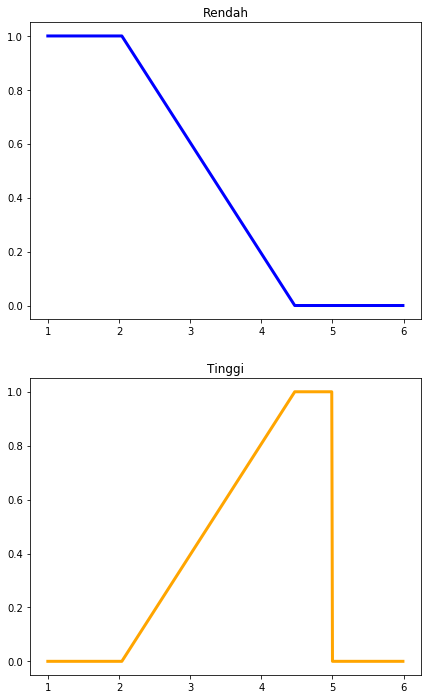

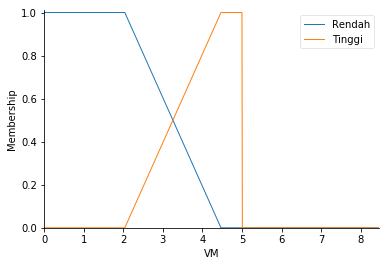

In [15]:
VM = np.arange(1,6,0.01) #membuat range menggunakan library numpy pada variabel Input VM
Rendah = fuzz.trapmf(VM, [1,1,2.04,4.47]) #Fungsi Keanggotaan Input VM berupa 'Rendah'
Tinggi = fuzz.trapmf(VM, [2.04,4.47,5,5]) #Fungsi Keanggotaan Input VM berupa 'Tinggi'

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(7, 12)) #Menggunakan Library Matplotlib untuk membentuk Plot dengan 2 kolom
ax0.plot(VM, Rendah, 'blue'  , linewidth = 3, label = 'Rendah') #Membentuk Plot untuk Fungsi Keanggotaan 'Rendah'
ax1.plot(VM, Tinggi, 'orange'  , linewidth = 3, label = 'Tinggi') #Membentuk Plot untuk Fungsi Keanggotaan 'Tinggi'

ax0.set_title('Rendah') #Title pada Plot 'Rendah'
ax1.set_title('Tinggi') #Title pada Plot 'Tinggi

VM = ctrl.Antecedent(np.arange(0,8.47,0.01), 'VM') #variabel Input VM dengan nilai 0 samapai 8.47 dengan range 0.01
VM['Rendah'] = fuzz.trapmf(VM.universe, [0,0,2.04,4.47]) #Fungsi Keanggotaan 'Kurang' dengan nilai 0 - 4.47
VM['Tinggi'] = fuzz.trapmf(VM.universe, [2.04,4.47,5,5]) #Fungsi Keanggotaan 'Baik' dengan nilai 2.04 - 5
VM.view() #Mencetak Plot untuk Input VM

## Deklarasi IPK sebagai Variabel Output
Fungsi Keanggotaan IPK (Tidak Memuaskan), Fungsi Keanggotaan IPK (Kurang Memuaskan), Fungsi Keanggotaan IPK (Memuaskan), dan Fungsi Keanggotaan IPK (Sangat Memuaskan)

 $IPK[Tidak Memuaskan] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 2 \ atau \ x \ < 0\\
       {x-0 \over 1-0} & \mbox{; } 0 < x \leq 1 \\
       {2 - x \over 2 - 1} & \mbox{; } 1 < x < 2 \\
    \end{array}
\right.$


 $IPK[Kurang Memuaskan] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 3 \ atau \ x \ < 1\\
       {x-1 \over 2-1} & \mbox{; } 1 < x \leq 2 \\
       {3 - x \over 3 - 2} & \mbox{; } 2 < x < 3 \\
    \end{array}
\right.$


 $IPK[Memuaskan] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 4 \ atau \ x \ < 2\\
       {x-2 \over 3-2} & \mbox{; } 2 < x \leq 3 \\
       {4 - x \over 4 - 3} & \mbox{; } 3 < x < 4 \\
    \end{array}
\right.$


$IPK[Sangat Memuaskan] =
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \ < 3 \\
       {x-3 \over 4-3} & \mbox{; } 3 < x \leq 4 \\
    \end{array}
\right.$


| Fungsi |   Nama Variabel    | Nama Himpunan Fuzzy |   Semesta pembicaraan  | Domain      |
|--------|--------------------|---------------------|------------------------|-------------|
|Output  | IPK                | Tidak Memuaskan            |   [1....4]        |  [1..2]   |
|        |                    | Kurang Memuaskan     |                        |  [2..3]   |
|        |                    |   Memuaskan           |                        |  [2..3]   |
|        |                    |   Sangat Memuaskan     |                        |  [3..4]  |

C:\Users\Alif\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


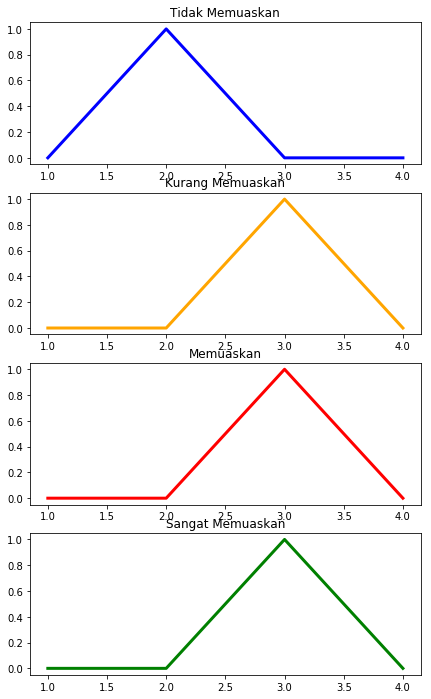

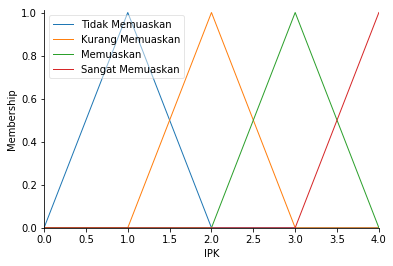

In [16]:
IPK = np.arange(1,5,1) #membuat range menggunakan library numpy pada variabel Output IPK
Tidak_Memuaskan = fuzz.trimf(IPK, [1,1,2]) #Fungsi Keanggotaan Output berupa 'Tidak_Memuaskan'
Kurang_Memuaskan = fuzz.trimf(IPK, [1,2,3]) #Fungsi Keanggotaan Output berupa 'Kurang_Memuaskan'
Memuaskan = fuzz.trimf(IPK, [2,3,4]) #Fungsi Keanggotaan Output berupa 'Memuaskan'
Sangat_Memuaskan = fuzz.trimf(IPK, [3,4,5]) #Fungsi Keanggotaan Output berupa 'Sangat_Memuaskan'


fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(7, 12)) #Menggunakan Library Matplotlib untuk membentuk Plot dengan 4 kolom
ax0.plot(IPK, Kurang_Memuaskan, 'blue'  , linewidth = 3, label = 'Tidak Memuaskan') #Membentuk Plot untuk Fungsi Keanggotaan 'Tidak_Memuaskan'
ax1.plot(IPK, Memuaskan, 'orange'  , linewidth = 3, label = 'Kurang Memuaskan') #Membentuk Plot untuk Fungsi Keanggotaan 'Kurang_Memuaskan'
ax2.plot(IPK, Memuaskan, 'red'  , linewidth = 3, label = 'Memuaskan') #Membentuk Plot untuk Fungsi Keanggotaan 'Memuaskan'
ax3.plot(IPK, Memuaskan, 'green'  , linewidth = 3, label = 'Sangat Memuaskan') #Membentuk Plot untuk Fungsi Keanggotaan 'Sangat_Memuaskan'


ax0.set_title('Tidak Memuaskan') #Title pada Plot 'Tidak Memuaskan'
ax1.set_title('Kurang Memuaskan') #Title pada Plot 'Kurang Memuaskan'
ax2.set_title('Memuaskan') #Title pada Plot 'Memuaskan'
ax3.set_title('Sangat Memuaskan') #Title pada Plot 'Sangat Memuaskan'

IPK = ctrl.Consequent(np.arange(0,5,1), 'IPK') #variabel Output IPK dengan nilai 0 samapai 5 dengan range 1
IPK['Tidak Memuaskan'] = fuzz.trimf(IPK.universe, [0,1,2]) #Fungsi Keanggotaan 'Tidak_Memuaskan' dengan nilai 0 - 2
IPK['Kurang Memuaskan'] = fuzz.trimf(IPK.universe, [1,2,3]) #Fungsi Keanggotaan 'Kurang_Memuaskan' dengan nilai 1 - 3
IPK['Memuaskan'] = fuzz.trimf(IPK.universe, [2,3,4]) #Fungsi Keanggotaan 'Memuaskan' dengan nilai 2 - 4
IPK['Sangat Memuaskan'] = fuzz.trimf(IPK.universe, [3,4,5]) #Fungsi Keanggotaan 'Kurang_Memuaskan' dengan nilai 3 - 5
IPK.view() #Mencetak Plot untuk Output IPK

# 2. Rule Base

Pada kasus ini terdapat 8 rule base seperti pada tabel dibawah ini

| No |     TPA   | NEM         | VM          | IPK                 |
|----|-----------|-------------|-------------|---------------------|
| 1  |   Kurang  |   Rendah    |   Rendah    |   Tidak Memuaskan  |
| 2  |   Kurang  |   Rendah    |   Tinggi    |   Kurang Memuaskan  |
| 3  |   Kurang  |   Tinggi    |   Rendah    |   Kurang Memuaskan  |
| 4  |   Kurang  |   Tinggi    |   Tinggi    |   Memuaskan         |
| 5  |   Baik    |   Rendah    |   Rendah    |   Kurang Memuaskan  |
| 6  |   Baik    |   Rendah    |   Tinggi    |   Memuaskan         |
| 7  |   Baik    |   Tinggi    |   Rendah    |   Memuaskan         |
| 8  |   Baik    |   Tinggi    |   Tinggi    |   Sangat Memuaskan         |



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x280a40bc9e8>)

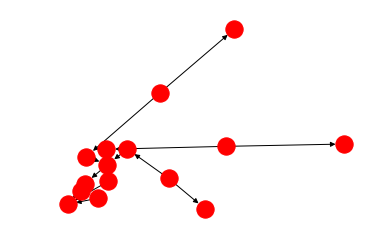

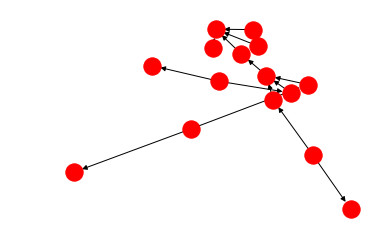

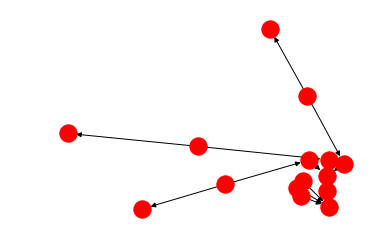

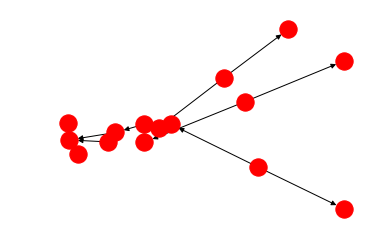

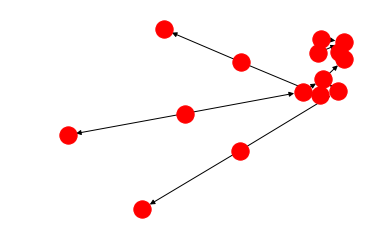

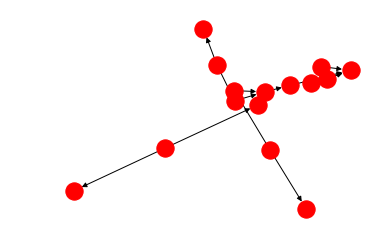

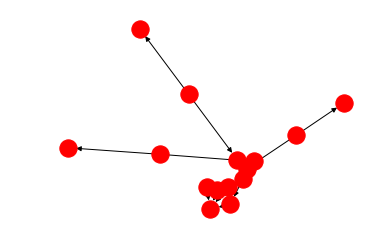

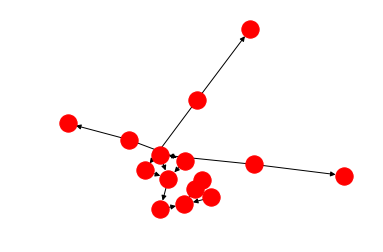

In [17]:
#Rule
rule1 = ctrl.Rule(TPA['Kurang'] & NEM['Rendah'] & VM['Rendah'], IPK['Tidak Memuaskan'])
rule2 = ctrl.Rule(TPA['Kurang'] & NEM['Rendah'] & VM['Tinggi'], IPK['Kurang Memuaskan'])
rule3 = ctrl.Rule(TPA['Kurang'] & NEM['Tinggi'] & VM['Rendah'], IPK['Kurang Memuaskan'])
rule4 = ctrl.Rule(TPA['Kurang'] & NEM['Tinggi'] & VM['Tinggi'], IPK['Memuaskan'])

rule5 = ctrl.Rule(TPA['Baik'] & NEM['Rendah'] & VM['Rendah'], IPK['Kurang Memuaskan'])
rule6 = ctrl.Rule(TPA['Baik'] & NEM['Rendah'] & VM['Tinggi'], IPK['Memuaskan'])
rule7 = ctrl.Rule(TPA['Baik'] & NEM['Tinggi'] & VM['Rendah'], IPK['Memuaskan'])
rule8 = ctrl.Rule(TPA['Baik'] & NEM['Tinggi'] & VM['Tinggi'], IPK['Sangat Memuaskan'])

rule1.view() #mencetak gambar RULE
rule2.view() #mencetak gambar RULE
rule3.view() #mencetak gambar RULE
rule4.view() #mencetak gambar RULE
rule5.view() #mencetak gambar RULE
rule6.view() #mencetak gambar RULE
rule7.view() #mencetak gambar RULE
rule8.view() #mencetak gambar RULE

## 3. Fuzzy Inference

Dari beberapa metode dalam fuzzy inference system, metode yang digunakan adalah Metode Mamdani.

In [18]:
show_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8]) #Menggabungkan Rule Menggunakan Library Control dari SKfuzzy

In [19]:
show = ctrl.ControlSystemSimulation(show_ctrl) #Memanggil Variabel Control dari Libarary Control SKFuzzy

## Defuzzifikasi
Defuzzifikasi merupakan pengubahan output fuzzy yang diperoleh dari mesin inferensi menjadi nilai tegas menggunakan fungsi keanggotaan yang sesuai dengan saat dilakukan fuzzyfikasi. Sekarang kita dapat mensimulasikan sistem kontrol hanya dengan menentukan input dan memanggil metode komputasi. 

## Contoh Kasus
Misalkan kita memasukkan nilai 65 untuk TPA, nilai 7.9 untuk NEM, dan nilai 3.47 untuk VM, maka IPK tergolong dalam kategori Tidak Memuaskan, Kurang Memuaskan, Memuaskan atau Sangat Memuaskan?

In [20]:
show.input['TPA'] = 65 #Memasukan Input nilai 65 pada Variabel Input 'TPA'
show.input['NEM'] = 7.9 #Memasukan Input nilai 7.9 pada Variabel Input 'NEM'
show.input['VM'] = 3.47 #Memasukan Input nilai 3.47 pada Variabel Input 'VM'

1. $Input.TPA[65] =
\left\{
    \begin{array}{ll}
       {103-65 \over 103-63} = 0.95 \\
       {65-43 \over 103-63} = 0.05 \\
    \end{array}
\right.$



2. $Input.NEM[7.9] =
\left\{
    \begin{array}{ll}
       {8.8-7.9 \over 8.8-4.47} = 0.21 \\
       {7.9-4.47 \over 8.8-4.47} = 0.79 \\
    \end{array}
\right.$



3. $Input.VM[3.47] =
\left\{
    \begin{array}{ll}
       {4.47-3.47 \over 4.47-2.04} = 0.41 \\
       {3.47-2.04 \over 4.47-2.04} = 0.59 \\
    \end{array}
\right.$

Mengambil nilai Minimal = (Min(0.95, 0.79, 0.59), Min(0.95, 0.79, 0.41), Min(0.95, 0.21, 0.59), Min(0.95, 0.21, 0.41), Min(0.05, 0.79, 0.59), Min(0.05, 0.79, 0.41), Min(0.05, 0.21, 0.59), Min(0.05, 0.21, 0.41))  =  (0.59, 0.41, 0.21, 0.21, 0.05, 0.05, 0.05, 0.05)


#### ntukan hasil akhir dengan menggunkan metode COG (Centre Of Gravity)
$COG =
\left\{
    \begin{array}{ll}
       {( (0+0.5+1.0)x0.21 + (1.5+2.0)x0.41 + (2.5+3.0+3.5)x0.59 + (4.0)x0.05 ) \over (0.21+0.21+0.21+0.41+0.41+0.59+0.59+0.59+0.05)} = 2.22 \\
    \end{array}
\right.$

In [21]:
show.compute() #Menampilkan Hasil Compute dari Rule

2.298061047384383


C:\Users\Alif\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


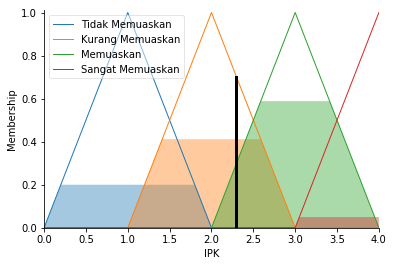

In [22]:
print(show.output['IPK']) #Menampilkan Output IPK dari Input yang telah dimasukkan di Contoh Kasus
IPK.view(sim=show) #Menampilkan Grafik/Plot dari Output IPK

Untuk Output IPK 

Seperti yang ada di gambar diatas didapatkan Nilai Defuzzifikasi untuk IPK sebesar 2.298061047384383 dan dapat Disimpulkan
dari gambar bahwa Nilai IPK itu termasuk kedalam nilai IPK yang Kurang Memuaskan



